<a href="https://colab.research.google.com/github/ShihaoCui/Mydata_1/blob/main/Assign3%264_1_1_miner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A typical AlexNet architecture is given below:

Convolutional layer: 96 11 * 11 filters with a stride of 4

Max pooling: 3 *3 max pooling with a stride of 2

Convolutional layer: 256 5*5 filters with a stride of 2

Max pooling: 3 *3 max pooling with a stride of 2

Convolutional layer: 384 3 * 3 filters with a stride of 1

Convolutional layer: 384 3 * 3 filters with a stride of 1

Convolutional layer: 256 3 * 3 filters with a stride of 1

Max pooling: 3* 3 max pooling with a stride of 2

Fully Connected Layer: 4096 neurons

Fully Connected Layer: 4096 neurons

Fully Connected Layer: **1000** neurons

As a first observation, please note the last fully connected layer consists of 1000 neurons, because AlexNet presented results on a 1000 class problem. Since you are dealing with a 10-class problem, obviously the last layer would consist of 10 neurons. Moreover, for a 10-class problem, it is possible that the three convolutional layers (before the FC layers) might be an overkill. So I'll be open to accepting implementations with a subset of layers in the typical architecture.                                        

In [1]:
# ## switch to GPU
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse
# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


In [2]:
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

#### (a) Using your favorite framework implement an Alex(Like)Net for 10-class classification, explaining your choice of layers. Do not use batch normalization. You may use drop-out for the fully connected layers. All activation functions would be ReLU.

In [3]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
# from keras.utils import np_utils
from keras import backend as K
import numpy as np
from keras import optimizers
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import pickle
import sys
import os
import matplotlib.pyplot as plt

In [4]:
# !git clone https://github.com/ShihaoCui/MyData_1.git

# import scipy.io as scio
# dataFile = './MyData_1/Coal mining pi/Image processed/all figures/XX.mat'
# data = scio.loadmat(dataFile)

# Data = data['XX']
# Data.shape

# train_X=np.array(Data,dtype="float16")
# train_X  = train_X.reshape(-1,930,1050,3)
# train_X.shape

# train_Y = np.array([0,0,0,0,0,0,0,0,0,0,#
#                     1,1,1,1,1,1,1,
#                     2,2,2,2,2,2,2,2,2,2,
#                     3,3,3,3,3,3,3,3,3,3,3],dtype="int")
# train_Y = train_Y.reshape(-1)
# train_Y.shape

# from sklearn.model_selection import train_test_split
# X = train_X
# Y1 = train_Y
# x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

In [5]:
!git clone https://github.com/ShihaoCui/MyData_1.git

Cloning into 'MyData_1'...
remote: Enumerating objects: 703, done.
remote: Counting objects: 100% (377/377), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 703 (delta 178), reused 278 (delta 80), pack-reused 326
Receiving objects: 100% (703/703), 359.25 MiB | 16.01 MiB/s, done.
Resolving deltas: 100% (257/257), done.
Updating files: 100% (324/324), done.


In [6]:
import scipy.io as scio
dataFile = './MyData_1/Coal mining pi/Image processed/all figures/XX.mat'
data = scio.loadmat(dataFile)

In [7]:
Data = data['XX']
Data.shape

(930, 1050, 3, 38)

In [8]:
train_X=np.array(Data,dtype="float16")
train_X  = train_X.reshape(-1,930,1050,3)
train_X.shape

(38, 930, 1050, 3)

In [9]:
train_Y = np.array([0,0,0,0,0,0,0,0,0,0,# 10
                    1,1,1,1,1,1,1, # 7
                    2,2,2,2,2,2,2,2,2,2,# 10
                    3,3,3,3,3,3,3,3,3,3,3],# 11
                   dtype="int")
train_Y = train_Y.reshape(-1)
train_Y.shape

(38,)

In [10]:
# train_Y = np.array([0,0,0,#
#                     1,1,1,1,1,1,1,
#                     2,2,2,2,2,2,2,2,
#                     3,3,3,3,3,3,3,3,3,3,3],dtype="int")
# train_Y = train_Y.reshape(-1)
# train_Y.shape

In [11]:
from sklearn.model_selection import train_test_split
X = train_X
Y1 = train_Y
x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

In [12]:
# load the data: train and test
# (x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [13]:
# data processing
from keras.utils import to_categorical
x_train = x_train.reshape(-1,3,930,1050)/255
x_test = x_test.reshape(-1,3,930,1050)/255
y_train = keras.utils.to_categorical(y_train,num_classes = 4)
y_test =keras.utils.to_categorical(y_test, num_classes=4)
x_train.shape

(30, 3, 930, 1050)

In [14]:
y_test.shape

(8, 4)

In [15]:
model  = Sequential()

In [16]:
# # Convolutional layer: 96 11*11 lters with a stride of 4 # 1
# model.add(Conv2D(64,(3,3),strides=4,padding='same'))
# model.add(Activation('relu'))

# # Max pooling: 3*3 max pooling with a stride of 2 # 2
# model.add(MaxPooling2D(
#     pool_size=(3,3),
#     strides=2,
#     padding='same',    # Padding method
#     data_format='channels_first',
# ))
# # model.summary()

# Convolutional layer: 96 11*11 lters with a stride of 4 # 1
model.add(Convolution2D(
    batch_input_shape=(None, 3, 930, 1050),
    kernel_size = (93,105),
    filters=96,
   # kernel_size=5,
    strides=4,
    padding='same',      # Padding method
    data_format='channels_first',
))
model.add(BatchNormalization()) # Batchnormalization


# Max pooling: 3*3 max pooling with a stride of 2 # 2
model.add(MaxPooling2D(
    pool_size=(3,3),
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 233, 263)      2812416   
                                                                 
 batch_normalization (Batch  (None, 96, 233, 263)      1052      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 96, 117, 132)      0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 96, 117, 132)      0         
                                                                 
Total params: 2813468 (10.73 MB)
Trainable params: 2812942 (10.73 MB)
Non-trainable params: 526 (2.05 KB)
_________________________________________________________________


In [17]:
# Convolutional layer: 256 5*5 lters with a stride of 2 # 3
# Max pooling: 3*3 max pooling with a stride of 2 # 4
model.add(Convolution2D(256,kernel_size = (11,11), strides=2, padding='same', data_format='channels_first'))
model.add(MaxPooling2D(pool_size= (3,3), padding = 'same',strides=2,data_format='channels_first'))
model.add(Activation('relu'))

In [18]:
# Convolutional layer: 384 3*3 lters with a stride of 1 # 5
model.add(Convolution2D(384,kernel_size = (3,3), strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))
# Convolutional layer: 384 3*3 lters with a stride of 1 # 6
model.add(Convolution2D(384,kernel_size = (3,3), strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))
# Convolutional layer: 256 3 *3 lters with a stride of 1 # 7
model.add(Convolution2D(256,kernel_size = (3,3),  strides=1, padding='same', data_format='channels_first'))
# Max pooling: 3 *3 max pooling with a stride of 2 # 8
model.add(MaxPooling2D(pool_size= (3,3), padding = 'same',strides=2,data_format='channels_first'))
model.add(Activation('relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 233, 263)      2812416   
                                                                 
 batch_normalization (Batch  (None, 96, 233, 263)      1052      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 96, 117, 132)      0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 96, 117, 132)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 59, 66)       2973952   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 256, 30, 33)       0

In [19]:
model.add(Flatten())
# Fully Connected Layer: 4096 neurons # 9
model.add(Dense(4069))
model.add(Dropout(0.25))
model.add(Activation('relu'))
# Fully Connected Layer: 4096 neurons # 10
model.add(Dense(4069))
model.add(Dropout(0.25))
model.add(Activation('relu'))
# Fully Connected Layer: 10* neurons # 11
model.add(Dense(4))
model.add(Activation('softmax')) # for classification
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 233, 263)      2812416   
                                                                 
 batch_normalization (Batch  (None, 96, 233, 263)      1052      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 96, 117, 132)      0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 96, 117, 132)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 59, 66)       2973952   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 256, 30, 33)       0

#### (b) (50 Points) Train the above network on CIFAR-10 (without data augmentation) using RMSProp gradient update (you are not required to implement it, you can use your framework's implementation). Along side, you will have to make appropriate choices for the learning rate, batch size, number of training epochs. Report your results on the test set in the form of confusion matrices.

In [20]:
opt = Adam(lr = 1e-4)

# opt= optimizers.RMSprop(lr=0.0001)

In [21]:
model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# training
history = model.fit(x_train,y_train,epochs = 250, batch_size = 30)

Epoch 1/250
1/1 [==============================] - 93s 93s/step - loss: 1.4233 - accuracy: 0.3000
Epoch 2/250
1/1 [==============================] - 1s 601ms/step - loss: 1028.5057 - accuracy: 0.3000
Epoch 3/250
1/1 [==============================] - 1s 601ms/step - loss: 21.8600 - accuracy: 0.2333
Epoch 4/250
1/1 [==============================] - 1s 601ms/step - loss: 2.8904 - accuracy: 0.3333
Epoch 5/250
1/1 [==============================] - 1s 601ms/step - loss: 1.4865 - accuracy: 0.2667
Epoch 6/250
1/1 [==============================] - 1s 601ms/step - loss: 1.3810 - accuracy: 0.2333
Epoch 7/250
1/1 [==============================] - 1s 600ms/step - loss: 1.3681 - accuracy: 0.2333
Epoch 8/250
1/1 [==============================] - 1s 601ms/step - loss: 1.3837 - accuracy: 0.2333
Epoch 9/250
1/1 [==============================] - 1s 620ms/step - loss: 1.3658 - accuracy: 0.3000
Epoch 10/250
1/1 [==============================] - 1s 602ms/step - loss: 1.3688 - accuracy: 0.3333
Epoch 

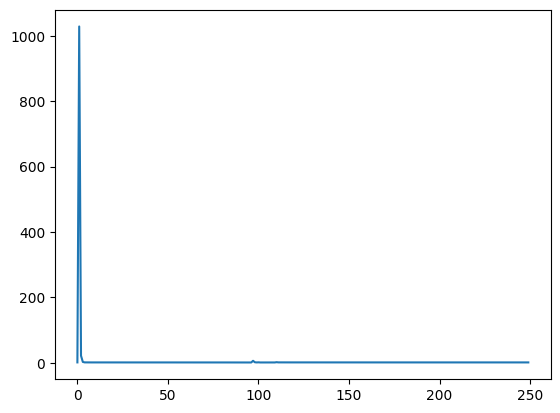

In [23]:
# Loss: convergence or not: Plot the curve
plt.plot(history.history['loss'])
plt.show()

##### confusion matrix

1/1 [==============================] - 41s 41s/step


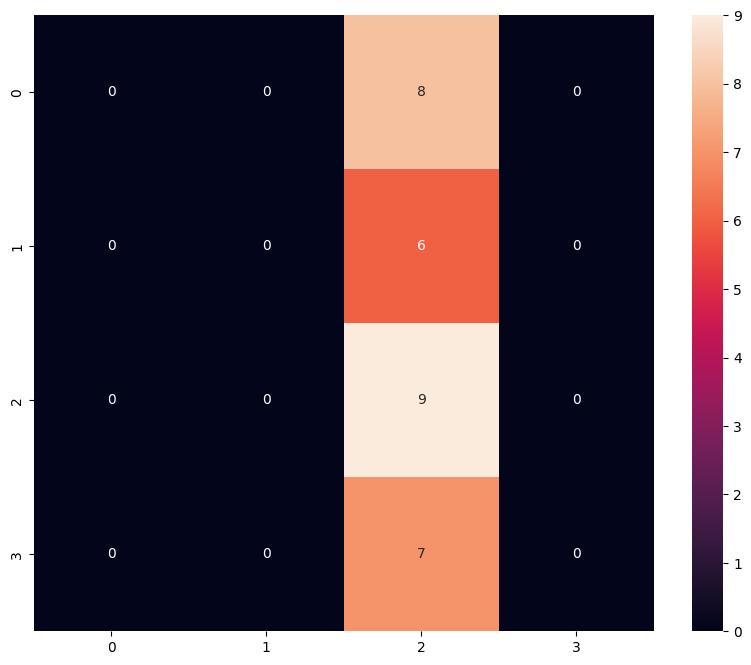

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(x_train)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_prediction,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_train,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", color = 'g');

1/1 [==============================] - 11s 11s/step


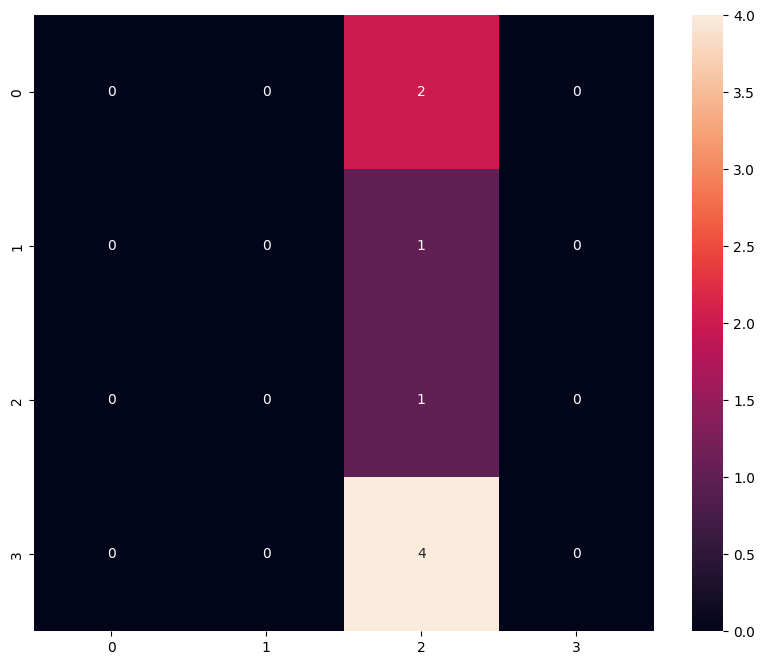

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_prediction = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_prediction,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", color = 'g');